# ***SEIR Prototype Model***
#### ***Date: Friday 23/10/2021***
\
### ***Differential Equations***

### $\frac{dS}{dt}= \frac{- \beta SI}{N} - vS$ 
### $\frac{dV}{dt}= vS$
### $\frac{dI}{dt}= \frac{\beta IS}{N} - \gamma I$
### $\frac{dR}{dt}= \gamma I$


---- 
## **Model 1** ##
### Parameters - $R_0=5$, $\beta=5$, $v=0.1$, $\gamma=1$, $N=1000$, $I=1$ ###




201
1.0
1.0000000565388472
1.0000011307763683
1.0000016961654905
1.0000045231080934
1.0000050256756832
1.0000056538851767
1.0000056538851765
1.0000169615953929
1.0000226155442804
1.0000508849880527
1.0000559106685303
1.0000621927697517
1.0000621927697142
1.000175264525565
1.0002318097800575
1.0005145060042009
1.0005647632917323
1.0006275849300073
1.0006275848923487
1.0017577682470968
1.002323796225268
1.0051509493939361
1.0056535948956737
1.006281871242728
1.006281833852657
1.0175306709779093
1.0232473785582563
1.0515496306450445
1.0566060118175644
1.0628919098272327
1.0628571050188438
1.170436205315626
1.2322504902287226
1.5248464200561638
1.5886803431081957
1.6485579801426384
1.631898509547601
1.832181338958752
1.9577042725507852
2.5442094372966033
2.686377264333674
2.7920298373389567
2.7396252330976214
2.996646581311582
3.1624442800422834
3.934798935304246
4.121612063639123
4.255214770496465
4.187148878216173
4.485683006532644
4.679036854838581
5.581335399767093
5.798222951821526
5.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


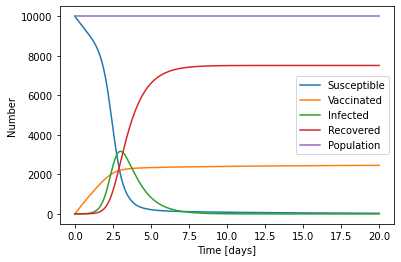

End-population: 10000


In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def seir_odes(t, x, b,v, g, N):
    S = x[0]
    V = x[1]
    I = x[2]
    R = x[3]

    dSdt = -(b/N)*S*I - v*S
    dVdt = v*S
    dIdt = b*S*(I/N) - g*I
    dRdt = g*I
    # g_m = (R + V)/N
    # R_t = 1/(1-g_m) * 1/g * np.log(I) + 1
    # print(R_t)

    return [dSdt, dVdt, dIdt, dRdt]

t_span = np.array([0,20]) # Time limits
t = np.linspace(t_span[0], t_span[1], t_span[1]*10 + 1)  # Time series
print(np.size(t))
x_0 = np.array([9999, 0,1, 0])  # Initial conditions for model variables: S, E, I, R respectively
args = (5, 0.1 ,1, np.sum(x_0))  # Arguments for our model parameters: \beta, v, \gamma, N

sol = solve_ivp(seir_odes, t_span, x_0, args=args, t_eval = t)

#R_0 = args[0]/args[1]
S = sol.y[0]
V = sol.y[1]
I = sol.y[2]
R = sol.y[3]
N = S + V + I + R

plt.plot(t, S, label='Susceptible')
plt.plot(t, V, label='Vaccinated')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.plot(t, N, label ='Population')
plt.xlabel('Time [days]')
plt.ylabel('Number')
plt.legend()
plt.show()
#print("R_0 is:", round(R_0, 3))
print("End-population:", int(round(N[-1],0)))